# Replication Study for: International Sports Events and Repression in Autocracies: Evidence from the 1978 FIFA World Cup

#### Dimitris Tsirmpas

Replicating the results and conclusions of the "International Sports Events and Repression in Autocracies: Evidence from the 1978 FIFA World Cup" study, which can be found [here](https://www.cambridge.org/core/journals/american-political-science-review/article/abs/international-sports-events-and-repression-in-autocracies-evidence-from-the-1978-fifa-world-cup/19FA0D5B0DD55259AA6A3E4FEBB7978A).

The datasets used, as well as the Suppporting Information (SI) document can be found [here](https://drive.google.com/drive/folders/1Bj3MghYHJcHkRLy5zePkGzMCqQr8Y-vW?usp=sharing).

## Q1: Overview

### Building tables SI3.1, SI3.2

We start by importing the dataset. The file we need is "main_data.tab". We should download it and all the other data files individually from the source, and not in a zip format, as the files contained in the zip lack headers. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

host_df = pd.read_table("data/main_data.tab", parse_dates=["date"])
host_df

,muni,id,prov,id_prov,muniprov,repression,lnrepression,dumrepression,hostcity,hostcitynum,...,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
0,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
1,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
2,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
3,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
4,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133727,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133728,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133729,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133730,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN


We will verify the validity of our dataset by recreating the two tables in the supporting information. 

We note that the second table is titled "Post World Cup Period", and that the tables seem to contain *roughly* half the records ("Obs." in the tables) of our collective dataset. This seems to suggest that the dataset described by the tables must be for records during and after the period of the world cup, which was between 1/6 and 25/6.

We also note that the second table features a new row called "Post World Cup". Its variable is binary and has a mean of about 0.78 which means 78% of the records in that table are tagged as such. It seems that the data in the 2nd dataframe are split further into 2 categories, possibly between observations during and after the WC.

To verify our hunch we will examine how many records match each of 3 periods: before, during and after the world cup.

In [2]:
start_date = datetime.datetime(1978, 6, 1)
end_date = datetime.datetime(1978, 6, 25)

before_wc = len(host_df[host_df.date < start_date])
during_wc = len(host_df[(host_df.date > start_date) & (host_df.date < end_date)])
after_wc = len(host_df[host_df.date > end_date])

print("Before WC: ", before_wc)
print("During WC: ", during_wc)
print("After WC: ", after_wc)
print(after_wc / (during_wc + after_wc))

Before WC:  75349
During WC:  11477
After WC:  45908
0.8


We note that:
1. The sum of the observations during and after the WC roughly match the count of observations in the tables
2. The ratio of observations after the WC, to the observations during and after the WC, match the one in table SI3.2

This seems to confirm our theory. The dataframe used in the tables is the subset of records occuring during and after the start of the WC.

We will produce 2 separate dataframes as the two tables feature different columns. Despite no documentation being available the columns used can be easily inferred because of their order and their names. 

The only non-obvious column is the peronist vote share, which is described by the column "vote frejuli" in the original dataset. This can be attributed to the argentinian name of the peronist party, [Frente Justicialista de Liberación](https://es.wikipedia.org/wiki/Frente_Justicialista_de_Liberaci%C3%B3n).

In [3]:
columns = ["date", "repression", "lnrepression", "dumrepression", "hostcity", "prox_hotelonly", 
                    "prox_hotelpress", "time_postwc", "time2_postwc", "time3_postwc", "lnpop_1970", "literacy_avg", 
                    "vote_frejuli", "lnrebact1974", "lnrepression70_77", "latitude", "lnstrikes", 
                    "lnlag_strikes", "lnlag2_strikes", "zone1", "zone2","zone3", "zone4", "zone5"]

si3_1_df = host_df.loc[host_df.date >= start_date, columns]

si3_1_df.columns = ["date", "RepressionEvents", "RepressionEventsLog", "RepressionEventsBin", "HostCity",
                    "ProximityToHotel", "ProximityToJournalistVenue", "Time", "Time2", "Time3",
                    "PopulationSizeLog", "LiteracyRate", "PeronistVoteShare", "RebelActivityLog",
                    "PastRepressionLog", "Latitude", "ProtestLog-CurrentMonth", 
                    "ProtestLog OneMonthAgo", "ProtestLog-TwoMonthsAgo", "MilitaryZone1",
                    "MilitaryZone2", "MilitaryZone3", "MilitaryZone4", "MilitaryZone5"]

stats_df = si3_1_df.describe().transpose().loc[:, ["count", "mean", "std", "min", "max"]]
stats_df.columns = ["Obs.", "Mean", "Std. dev.", "Min.", "Max."]
stats_df

,Obs.,Mean,Std. dev.,Min.,Max.
RepressionEvents,58321.0,0.003858,0.096237,0.000000e+00,9.000000
RepressionEventsLog,58321.0,0.002141,0.046726,0.000000e+00,2.302585
RepressionEventsBin,58321.0,0.002366,0.048587,0.000000e+00,1.000000
HostCity,58383.0,0.010020,0.099598,0.000000e+00,1.000000
ProximityToHotel,58321.0,7.005477,1.612787,0.000000e+00,9.398466
ProximityToJournalistVenue,58321.0,7.083793,1.627998,0.000000e+00,9.398466
Time,58383.0,0.590000,0.337740,1.000000e-02,1.170000
Time2,58383.0,0.462167,0.411383,1.000000e-04,1.368900
Time3,58383.0,0.407277,0.460040,9.999999e-07,1.601613
PopulationSizeLog,56628.0,9.701179,1.336451,6.056784e+00,14.904898


In [4]:
si3_2_df = host_df.loc[host_df.date >= start_date].copy() # copy the df as we shouldn't insert a new column to a view

si3_2_df["PostWorldCupPeriod"] = np.where(si3_2_df.date > end_date, 1, 0)

columns = ["date", "repression", "lnrepression", "dumrepression", "hostcity", 
            "time_postwc", "time2_postwc", "time3_postwc", "lnpop_1970", "literacy_avg", 
            "vote_frejuli", "lnrebact1974", "lnrepression70_77", "zone1", "zone2",
            "zone3", "zone4", "zone5",  "PostWorldCupPeriod"]
renamed_columns = ["date", "RepressionEvents", "RepressionEventsLog", "RepressionEventsBin", 
                      "HostCity", "Time", "Time2", "Time3",
                    "PopulationSizeLog", "LiteracyRate", "PeronistVoteShare", "RebelActivityLog",
                    "PastRepressionLog", "MilitaryZone1", "MilitaryZone2", "MilitaryZone3",
                    "MilitaryZone4", "MilitaryZone5", "PostWorldCupPeriod"]
si3_2_df = si3_2_df.loc[:, columns]
si3_2_df.columns = renamed_columns

stats_df = si3_2_df.describe().transpose().loc[:, ["count", "mean", "std", "min", "max"]]
stats_df.columns = ["Obs.", "Mean", "Std. dev.", "Min.", "Max."]
stats_df

,Obs.,Mean,Std. dev.,Min.,Max.
RepressionEvents,58321.0,0.003858,0.096237,0.000000e+00,9.000000
RepressionEventsLog,58321.0,0.002141,0.046726,0.000000e+00,2.302585
RepressionEventsBin,58321.0,0.002366,0.048587,0.000000e+00,1.000000
HostCity,58383.0,0.010020,0.099598,0.000000e+00,1.000000
Time,58383.0,0.590000,0.337740,1.000000e-02,1.170000
Time2,58383.0,0.462167,0.411383,1.000000e-04,1.368900
Time3,58383.0,0.407277,0.460040,9.999999e-07,1.601613
PopulationSizeLog,56628.0,9.701179,1.336451,6.056784e+00,14.904898
LiteracyRate,56628.0,0.717073,0.110344,3.157895e-01,0.900552
PeronistVoteShare,57447.0,58.752138,11.538778,2.850000e+01,94.300000


### Building Figure SI.1.1

The authors support the claim that autocratic regimes are very likely to pursue hosting international events with two figures. We will begin with figure SI.1. which features all host of the
most prominent international sports events from 1945 onwards and their regime.

We start by importing the supplementary dataset for the graph.

In [5]:
sports_df = pd.read_table("data/figure_SI11_data.tab")
sports_df

,year,regime,baseline,democ,autoc
0,1987.0,0.0,2.5,3.0,NaN
1,1987.0,0.0,2.5,3.0,NaN
2,1991.0,0.0,2.5,3.0,NaN
3,1991.0,0.0,2.5,3.0,NaN
4,1995.0,1.0,2.5,NaN,2.0
...,...,...,...,...,...
328,2010.0,0.0,27.5,28.0,NaN
329,2014.0,0.0,27.5,28.0,NaN
330,2018.0,0.0,27.5,28.0,NaN
331,2018.0,0.0,27.5,28.0,NaN


This is a very curiously formatted dataset. Instead of event names and a binary variable telling us whether the event was hosted in a democracy or an autocracy we are presented with a at-first-glance nonsensical column called "baseline" and two democracy/autocracy columns with ever increasing float values.

To figure out the format of the dataset we notice the following patterns:
1. Each row has a value in at most one of the two political columns. 
2. When that value is in the democratic column, the regime column is 0, and if it's in the autocratic one, the regime column is 1
3. The baseline variable scales always by 2.5
4. The difference between the baseline and the democ and autoc values is always 0.5 or -0.5 respectively 

We can deduce that the "baseline" variable refers to the height in the S1.1 chart, corresponding to the event's name, while the democ/autoc values are the little rectangles tangling over/under each line. With this knowledge we can start building our graph.

The most straightforward way to build a graph like this is to plot it as a scatterplot, hiding the lines connecting the points, and formatting the markers as to resemble the rectangles used in SI1.1. This can be done by scaling the markers' size according to the figure's total size.

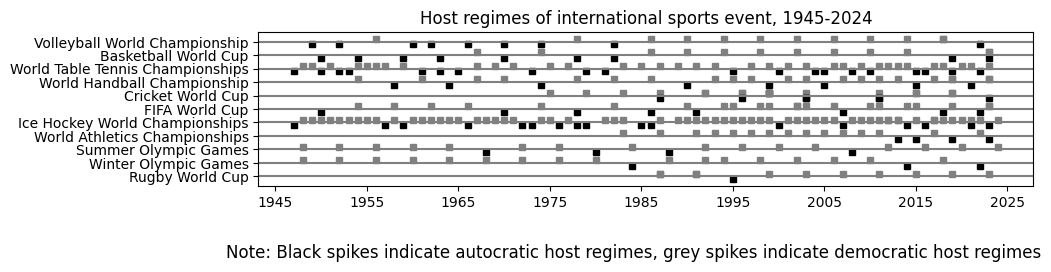

In [6]:
events = ["Volleyball World Championship", "Basketball World Cup",
              "World Table Tennis Championships", "World Handball Championship",
              "Cricket World Cup", "FIFA World Cup", 
              "Ice Hockey World Championships", "World Athletics Championships",
              "Summer Olympic Games", "Winter Olympic Games", "Rugby World Cup"]
events.reverse() # oops

x_size = 10
y_size = 2
plt.figure(figsize=(x_size, y_size))

plt.plot(sports_df.year, sports_df.democ, 
         linestyle="None", marker="s", markersize=y_size*2, mfc="grey", mec="grey")

plt.plot(sports_df.year, sports_df.autoc, 
         linestyle="None", marker="s", markersize=y_size*2, mfc="k", mec="k")

yticks = np.arange(2.5, 30, 2.5)
for height in yticks:
    plt.axhline(y=height, color="grey")

plt.title("Host regimes of international sports event, 1945-2024")
plt.figtext(0.5, -0.25, "Note: Black spikes indicate autocratic host regimes, grey spikes indicate democratic host regimes",
            wrap=True, horizontalalignment='center', fontsize=12)

plt.xticks(np.arange(1945.0, 2026.0, 10))
plt.yticks(yticks, labels=events)

plt.show()

### Plotting Figure 1

Figure 1 shows the share of autocratic hosts from the end of the Cold War and onwards.

Again we need to import a separate dataset.

In [7]:
democracy_host_df = pd.read_table("data/figure_1_data.tab")
democracy_host_df

,postcwy,event_selec,autochost,autochostperc
0,4.0,24.0,6.0,25.000000
1,1.0,25.0,2.0,8.000000
2,3.0,25.0,5.0,20.000000
3,7.0,27.0,10.0,37.037037
4,5.0,30.0,6.0,20.000000
5,2.0,31.0,4.0,12.903226
6,6.0,32.0,9.0,28.125000


We simply need to format the date, use the original column as the index, and sort our dataframe according to that index.

In [8]:
to_period = lambda year: f"{int(year * 5 + 1985)}-{int(year * 5 + 1989)}"

democracy_host_df["period"] = democracy_host_df.postcwy.apply(to_period)
democracy_host_df = democracy_host_df.set_index("postcwy").sort_index()
democracy_host_df

,event_selec,autochost,autochostperc,period
postcwy,,,,
1.0,25.0,2.0,8.000000,1990-1994
2.0,31.0,4.0,12.903226,1995-1999
3.0,25.0,5.0,20.000000,2000-2004
4.0,24.0,6.0,25.000000,2005-2009
5.0,30.0,6.0,20.000000,2010-2014
6.0,32.0,9.0,28.125000,2015-2019
7.0,27.0,10.0,37.037037,2020-2024


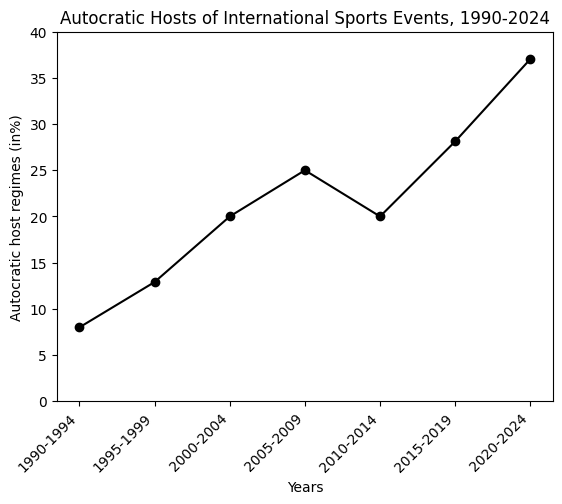

In [9]:
plt.plot(democracy_host_df.period, democracy_host_df.autochostperc, color="black", marker="o")
plt.title("Autocratic Hosts of International Sports Events, 1990-2024")
plt.ylabel("Autocratic host regimes (in%)")
plt.xlabel("Years")

plt.yticks(np.arange(0, 41, 5))
plt.xticks(rotation=45, ha="right")
plt.show()

## Q2: Repression in Departments with and without Host Cities

In this section we will pose our hypotheses about the trends in repression before, during and after the 1978 Argentina World Cup. To do so we will follow the methodology of the researchers (Supporting Information 4, point 1) and run three ordinary-least-squares linear classifier (OLS) for our data. The first model will simply feature the variables we are interested in ($hostcity$, $time$ and $time^{2}$), the second will take control variables into consideration and the third, the military zones present in each region.

We will use the original, full dataset and the statsmodels library to build our models.

From the Supporting Information we note that the OLS models use the "logarithmized version of the depedent variable", which in our case means the `lnrepression` variable.

Initially we attempted to run the formula `lnrepression ~ hostcity * time + hostcity * time2`, but our model failed to properly fit the data. Thus, we use the already computed `hostcitytime` and `hostcitytime2` columns of our dataframe instead to train the model.

In [10]:
import statsmodels.formula.api as smf

# No controls
# No Zone FE
vars1 = "hostcitytime + hostcitytime2 + hostcity + time + time2"
formula = "lnrepression ~ " + vars1
model = smf.ols(formula, data=host_df)
res1 = model.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     554.0
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:13:57   Log-Likelihood:                 89824.
No. Observations:               58107   AIC:                        -1.796e+05
Df Residuals:                   58101   BIC:                        -1.796e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0026      0.001      3.912      0.000       0.001       0.004
hostcitytime      0.4012      0.026     15.680      0.000       0.351       0.451
hostcitytime2    -0.3230      0.021    -15.372      0.000      -0.364      -0.282
hostcity          0.0202      0.007      3.086      0.002       0.007       0.033
time             -0.0028      0.003     -1.106      0.269      -0.008       0.002
time2             0.0020      0.002      0.959      0.338      -0.002       0.006
==============================================================================
Omnibus:                   125118.610   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        514921392.904
Skew:                          19.504   Prob(JB):                         0.00
Kurtosis:                     462.518   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

F-statistic aside, our model matches almost perfectly the results of table SI4.1. We will now build the second model, which according to the paper includes the following control variables:

* The average literacy
* The peronist vote share
* Past rebel activity
* Past repression

The choice of control variables is described in the following excerpts:

`To account for potential confounders, we collect information on various pretreatment, department-level control variables that might have affected both the selection of host cities at the end of 1974 and repression patterns across departments in 1978.`

`From the 1970 Argentine census, we include Literacy Rate as a proxy for socioeconomic composition and Population Size to capture differences in the potential breeding ground for subversion.`

`As the selection of host cities might have been influenced by visible opposition to the dictatorship, we also control for departments’ Peronist Vote Share in the 1973 elections—the last national election before the junta took power. `

`We also include the variable Rebel Activity, which is based on the collection of original data on insurgent attacks in 1974, using published statements by security forces and the insurgent groups. `

`To account for pre-World Cup trends in violence, we add Past Repression, which measures the history of state repression in each department between 1970 and 1977.`

In [11]:
# Yes controls
# No Zone FE
vars2 = "+ literacy_avg + vote_frejuli + lnrebact1974 + lnrepression70_77" 
formula2 = formula + vars2
model = smf.ols(formula2, data=host_df)
res2 = model.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     389.1
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:13:58   Log-Likelihood:                 87274.
No. Observations:               56628   AIC:                        -1.745e+05
Df Residuals:                   56618   BIC:                        -1.744e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0038      0.003      1.356      0.175      -0.002       0.009
hostcitytime          0.4014      0.026     15.612      0.000       0.351       0.452
hostcitytime2        -0.3231      0.021    -15.305      0.000      -0.364      -0.282
hostcity             -0.0034      0.007     -0.511      0.609      -0.016       0.010
time                 -0.0030      0.003     -1.161      0.246      -0.008       0.002
time2                 0.0022      0.002      1.007      0.314      -0.002       0.006
literacy_avg         -0.0038      0.003     -1.375      0.169      -0.009       0.002
vote_frejuli      -3.731e-05    2.3e-05     -1.621      0.105   -8.24e-05    7.79e-06
lnrebact1974      -6.027e-05      0.000     -0.427      0.669      -0.000       0.000
lnrepression70_77     0.0046      0.000     25.053      0.000       0.004       0.005
==============================================================================
Omnibus:                   120581.536   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        468542387.264
Skew:                          19.008   Prob(JB):                         0.00
Kurtosis:                     446.995   Cond. No.                     9.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For the third model we keep the control variables and additionally include the five military zones as detailed by the paper:

`Finally, we include fixed effects for military zones to control for subnational features of Argentina’s repressive system (Scharpf 2018).`

In [12]:
# Yes controls
# Yes Zone FE
vars3 = " + zone1 + zone2 + zone3 + zone4 + zone5"
formula3 = formula2 + vars3
model = smf.ols(formula3, data=host_df)
res3 = model.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     283.6
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:13:58   Log-Likelihood:                 87360.
No. Observations:               56628   AIC:                        -1.747e+05
Df Residuals:                   56614   BIC:                        -1.746e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0058      0.003      2.103      0.035       0.000       0.011
hostcitytime          0.4014      0.026     15.635      0.000       0.351       0.452
hostcitytime2        -0.3231      0.021    -15.328      0.000      -0.364      -0.282
hostcity             -0.0034      0.007     -0.506      0.613      -0.016       0.010
time                 -0.0030      0.003     -1.163      0.245      -0.008       0.002
time2                 0.0022      0.002      1.008      0.313      -0.002       0.006
literacy_avg         -0.0107      0.003     -3.440      0.001      -0.017      -0.005
vote_frejuli       1.287e-05   2.78e-05      0.463      0.643   -4.16e-05    6.73e-05
lnrebact1974         -0.0009      0.000     -5.532      0.000      -0.001      -0.001
lnrepression70_77     0.0049      0.000     24.950      0.000       0.005       0.005
zone1                 0.0078      0.001      9.465      0.000       0.006       0.009
zone2                -0.0015      0.001     -2.287      0.022      -0.003      -0.000
zone3                -0.0011      0.001     -1.245      0.213      -0.003       0.001
zone4                -0.0002      0.002     -0.117      0.907      -0.003       0.003
zone5                 0.0007      0.001      0.955      0.340      -0.001       0.002
==============================================================================
Omnibus:                   120377.988   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        464147526.917
Skew:                          18.934   Prob(JB):                         0.00
Kurtosis:                     444.905   Cond. No.                     7.42e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.67e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

There are plently of observations we can make from our model's results;

1. Our results remain the same across the 3 models. This means that they aren't influenced by any of the control variables (model 2), nor the military presence in the region (model 3). Indeed, our models assign relatively small coefficients to these variables, indicating they are not significant in predicting repression events. 

2. There's a very clear, linear relationship between repression and $hostcity \cdot time$. This indicates that repression increased in host cities towards the start of the WC.

3. There's also a strong, *inverse* relationship between repression and $hostcity \cdot time^{2}$. Let's imagine time as a function $f(x) = time(x)$, where $x$ is the date. Then the function $f^{2}(x) = time^{2}(x)$ accelerates and becomes increasingly more important as $x$ becomes larger ($x > 1$ and $f^{2}$ is quadratic), aka when the date is close to, or during the WC. This, with the large inverse relationship between $f^{2}$ and repression, means that in the run-up to, and during the tournament, repression mostly disappeared in host cities.

4. Time and hostcity by themselves didn't play a significant role, as their coefficients remain small. They are significant only when paired together.

What we can state based on these observations therefore is that repression increased significantly in host cities during the run-up to the WC (observation 2), then sharply fell as the tournament started (observation 3). This wasn't influenced by any of the control variables or military presence (observation 1). The effect was also absent from non-host cities (observation 4). 

We can therefore put forward the two hypotheses also present in the original paper:

#### Hypothesis 1: In the run-up to the tournament, state repression spiked in host cities but not in non-host cities

#### Hypothesis2: During the tournament, state repression largely halts in host cities but remains stable in non-host cities

The rest of this document will focus on testing and verifying these hypotheses.

## Q3: Graphical Overview of Effects

Numbers and coefficients are nice, but sometimes we need a graph to visualize what's happening. In this section we will build Figure 5 of the original paper which shows the predicted number of repression events before and during the tournament, both in host and in non-host cities.

We begin by modifying the original model to predict the count of repression events, instead of their logarithm. We will also use the third model, containing both control variables and military zone effects, as mentioned in Figure 5, which states that `Calculations are based on interaction effects of Model 3, Table 1`.

We will now build two datasets, one containing host cities and the other non-host cities. We group them by date, and select the mean of the daily repression events. 

In [13]:
relevant_columns = ["hostcitytime", "hostcitytime2", "hostcity", "time", "time2", "literacy_avg", 
           "vote_frejuli", "lnrebact1974", "lnrepression70_77", "zone1", "zone2", "zone3", "zone4",
          "zone5"]

# we drop records with nan values in the relevant columns because these records will be
# later discarded by the model, and we need the data to be the same size as our predictions
clear_df = host_df.dropna(subset=relevant_columns)

formula = "repression ~ " + "+".join(relevant_columns)
model = smf.ols(formula, data=clear_df)
predictor = model.fit()

host_cities_df = clear_df[clear_df.hostcity == 1].groupby("date").mean(numeric_only=True)
non_host_cities_df = clear_df[clear_df.hostcity == 0].groupby("date").mean(numeric_only=True)

host_cities_df

,id,id_prov,repression,lnrepression,dumrepression,hostcity,hostcitynum,prewc_time3m,time,time2,...,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
date,,,,,,,,,,,,,,,,,,,,,
1978-03-01,222.0,8.6,0.2,0.138629,0.2,1.0,3.0,1.0,0.01,0.0001,...,0.2,0.0,0.2,0.0,0.0,0.0,0.2,1.0,1.0,1.0
1978-03-02,222.0,8.6,0.2,0.138629,0.2,1.0,3.0,2.0,0.02,0.0004,...,0.2,0.0,0.2,0.0,0.0,0.0,0.2,1.0,1.0,1.0
1978-03-03,222.0,8.6,0.2,0.138629,0.2,1.0,3.0,3.0,0.03,0.0009,...,0.2,0.0,0.2,0.0,0.0,0.0,0.2,1.0,1.0,1.0
1978-03-04,222.0,8.6,0.2,0.138629,0.2,1.0,3.0,4.0,0.04,0.0016,...,0.2,0.0,0.2,0.0,0.0,0.0,0.2,1.0,1.0,1.0
1978-03-05,222.0,8.6,0.2,0.138629,0.2,1.0,3.0,5.0,0.05,0.0025,...,0.2,0.0,0.2,0.0,0.0,0.0,0.2,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-06-21,222.0,8.6,0.0,0.000000,0.0,1.0,3.0,113.0,1.13,1.2769,...,0.2,0.0,0.2,0.0,0.0,0.0,0.2,1.0,1.0,1.0
1978-06-22,222.0,8.6,0.0,0.000000,0.0,1.0,3.0,114.0,1.14,1.2996,...,0.2,0.0,0.2,0.0,0.0,0.0,0.2,1.0,1.0,1.0
1978-06-23,222.0,8.6,0.0,0.000000,0.0,1.0,3.0,115.0,1.15,1.3225,...,0.2,0.0,0.2,0.0,0.0,0.0,0.2,1.0,1.0,1.0


For each of the two datasets we use our fitted model to predict the daily repression events, as well as the confidence intervals for those predictions. 

In [28]:
host_cities_df["pred"] = predictor.predict(host_cities_df)
non_host_cities_df["pred"] = predictor.predict(non_host_cities_df)

predictions = predictor.get_prediction(host_cities_df)
preddf = predictions.summary_frame(alpha=0.05)
preddf.index = host_cities_df.index

# The confidence intervals continue being the most uncooperative part of the assignment,
# both here and in the later graphs. The model seems to give an absolute huge ci when using
# the obs_ci columns, and a tiny one when using the mean_ci ones. There's no documentation
# on these columns. obs_ci is probably correct, since in the last Q3 graph the actual observations
# do indeed jump to the great heights, as obs_ci expects, but we will keep using mean_ci because it
# doesn't break the overall shape of the graph, which is the graph's main purpose here.
host_cities_df["upper_limit"] = preddf.mean_ci_upper
host_cities_df["lower_limit"] = preddf.mean_ci_lower

predictions = predictor.get_prediction(non_host_cities_df)
preddf = predictions.summary_frame(alpha=0.05)
preddf.index = non_host_cities_df.index
non_host_cities_df["upper_limit"] = preddf.mean_ci_upper
non_host_cities_df["lower_limit"] = preddf.mean_ci_lower

non_host_cities_df

,hostcitytime,hostcitytime2,hostcity,time,time2,literacy_avg,vote_frejuli,lnrebact1974,lnrepression70_77,zone1,zone2,zone3,zone4,zone5,repression,pred,upper_limit,lower_limit
date,,,,,,,,,,,,,,,,,,
1978-03-01,0.0,0.0,0.0,0.01,0.0001,0.81585,57.566667,3.589625,4.068962,0.333333,0.166667,0.233333,0.2,0.066667,0.200000,0.049961,0.083677,0.016245
1978-03-02,0.0,0.0,0.0,0.02,0.0004,0.81585,57.566667,3.589625,4.068962,0.333333,0.166667,0.233333,0.2,0.066667,0.033333,0.049457,0.082031,0.016884
1978-03-03,0.0,0.0,0.0,0.03,0.0009,0.81585,57.566667,3.589625,4.068962,0.333333,0.166667,0.233333,0.2,0.066667,0.100000,0.048962,0.080424,0.017500
1978-03-04,0.0,0.0,0.0,0.04,0.0016,0.81585,57.566667,3.589625,4.068962,0.333333,0.166667,0.233333,0.2,0.066667,0.000000,0.048475,0.078857,0.018092
1978-03-05,0.0,0.0,0.0,0.05,0.0025,0.81585,57.566667,3.589625,4.068962,0.333333,0.166667,0.233333,0.2,0.066667,0.000000,0.047995,0.077330,0.018661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-06-21,0.0,0.0,0.0,1.13,1.2769,0.81585,57.566667,3.589625,4.068962,0.333333,0.166667,0.233333,0.2,0.066667,0.000000,0.043059,0.072393,0.013724
1978-06-22,0.0,0.0,0.0,1.14,1.2996,0.81585,57.566667,3.589625,4.068962,0.333333,0.166667,0.233333,0.2,0.066667,0.033333,0.043447,0.073829,0.013065
1978-06-23,0.0,0.0,0.0,1.15,1.3225,0.81585,57.566667,3.589625,4.068962,0.333333,0.166667,0.233333,0.2,0.066667,0.066667,0.043843,0.075305,0.012381


Having all the information we need, we can plot our graphs.

C:\Users\user\AppData\Local\Temp\ipykernel_16264\1485846474.py:37: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.gcf().autofmt_xdate()


<Figure size 2000x1000 with 0 Axes>

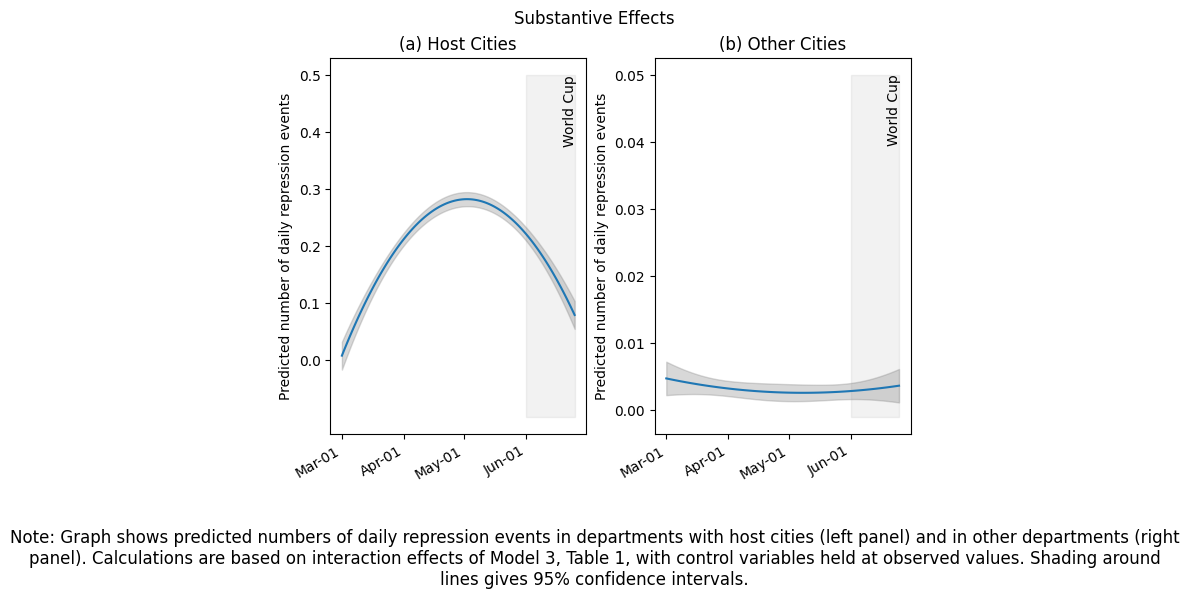

In [15]:
import matplotlib.dates as mdates


note = """Note: Graph shows predicted numbers of daily repression events in departments with host cities (left panel) and in other departments (right
panel). Calculations are based on interaction effects of Model 3, Table 1, with control variables held at observed values. Shading around
lines gives 95% confidence intervals."""
date_range = pd.date_range("1978-6-1", "1978-6-25")

plt.figure(figsize=(20, 10))
fig, (ax1, ax2) = plt.subplots(1, 2, layout="constrained")
fig.suptitle("Substantive Effects")
plt.figtext(0.5, -0.2, note, wrap=True, horizontalalignment='center', fontsize=12)

ax1.plot(host_cities_df.pred)
ax1.fill_between(host_cities_df.index, host_cities_df.lower_limit, host_cities_df.upper_limit,
                 alpha=.3, color='grey')
ax1.fill_between(date_range.values, -0.1, 0.5, alpha=.1, color="grey")
ax1.set_yticks(np.arange(0, 0.6, 0.1))
ax1.set_title("(a) Host Cities")
ax1.set_ylabel("Predicted number of daily repression events")
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax1.text(datetime.datetime(1978, 6, 19), 0.38, "World Cup", rotation= 90)


ax2.plot(non_host_cities_df.pred)
ax2.fill_between(non_host_cities_df.index, non_host_cities_df.lower_limit,
                 non_host_cities_df.upper_limit, alpha=.3, color='grey')
ax2.fill_between(date_range.values, -0.001, 0.05, alpha=.1, color="grey")
ax2.set_yticks(np.arange(0, 0.06, 0.01))
ax2.set_title("(b) Other Cities")
ax2.set_ylabel("Predicted number of daily repression events")
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax2.text(datetime.datetime(1978, 6, 19), 0.04, "World Cup", rotation= 90)

plt.gcf().autofmt_xdate()
# just ignore this warning

The graphs seem to confirm the hypothesis we formed in Q2. According to our model, repression spiked in the run-up to the WC and sharply fell after its start in host cities. On the other hand, repression was relatively absent in non-host cities, and didn't spike at all during this period. 

However, these findings are based on our model's predictions. It might not be convincing enough to base a hypothesis on what a model thinks happened, as opposing to what actually happened. We will replot the graphs, adding the actual number of repression events to verify that our model represents these trends correctly.

C:\Users\user\AppData\Local\Temp\ipykernel_16264\2543586427.py:31: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.gcf().autofmt_xdate()


<Figure size 2000x1000 with 0 Axes>

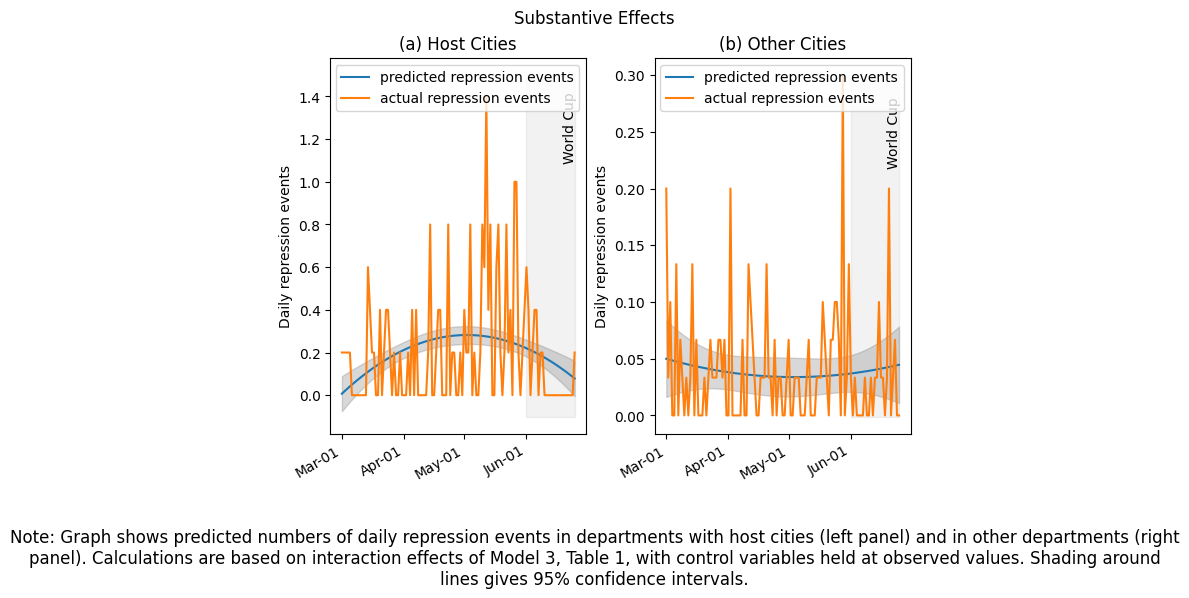

In [29]:
plt.figure(figsize=(20, 10))
fig, (ax1, ax2) = plt.subplots(1, 2, layout="constrained")
fig.suptitle("Substantive Effects")
plt.figtext(0.5, -0.2, note, wrap=True, horizontalalignment='center', fontsize=12)

ax1.plot(host_cities_df.pred)
ax1.plot(host_cities_df.repression)
ax1.fill_between(host_cities_df.index, host_cities_df.lower_limit, host_cities_df.upper_limit,
                 alpha=.3, color='grey')
ax1.fill_between(date_range.values, -0.1, 1.5, alpha=.1, color="grey")
ax1.set_title("(a) Host Cities")
ax1.set_ylabel("Daily repression events")
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax1.text(datetime.datetime(1978, 6, 19), 1.1, "World Cup", rotation= 90)
ax1.legend(labels=["predicted repression events", "actual repression events"])


ax2.plot(non_host_cities_df.pred)
ax2.plot(non_host_cities_df.repression)
ax2.fill_between(non_host_cities_df.index, non_host_cities_df.lower_limit,
                 non_host_cities_df.upper_limit, alpha=.3, color='grey')
ax2.fill_between(date_range.values, -0.001, 0.3, alpha=.1, color="grey")
ax2.set_title("(b) Other Cities")
ax2.set_ylabel("Daily repression events")
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax2.text(datetime.datetime(1978, 6, 19), 0.22, "World Cup", rotation= 90)
ax2.legend(labels=["predicted repression events", "actual repression events"])

plt.gcf().autofmt_xdate()

The spikes in actual repression events may seem to suggest that our model grossly undereports predicted repression events. It's important however to note that many days had 0 reported repression events, and our model tries to track the *general trend* of repression events.

What we see in this graph lends even more credibility to our hypothesis. In host cities repression indeed spiked then abruptly stopped right at the start of the tournament. In non host cities repression remained constant and in a relatively low level. Note that the two graphs above do *not* use the same scale on the y-axis.

## Q4: Robustness Check Using a Dichotomous Indicator of Repression

One of the uncertainties faced by the original researchers was the accuracy of the reported repression events. A dictatorship would obviously not keep many documents on the disappearances, killings and general repressive measures during its reign, and so the researchers had to rely on datasets largely based on testimony. According to them, reporting numbers may be underreported but should nevertheless work *against* their hypotheses.

In order to verify the Q2 hypotheses we should downscale this reporting bias. In order to do this we can "flatten" our results to only include a binary variable that describes whether any repression event occured in a certain day. We can then use a logistic regression classifier to verify whether the results remain consistent.

This section is very straightforward. We need to use the same formulas as above, but where the dependent variable is the binary repression variable (referred as `dumrepression` in the dataset) instead of the logarithmized variable we used in the previous section. We will also use a Logistic Regression model instead of the previous Ordinary Least Squares model.

In [17]:
formula = "dumrepression ~ " + vars1
model = smf.logit(formula, data=host_df)
model.fit().summary()

Optimization terminated successfully.
         Current function value: 0.019190
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          dumrepression   No. Observations:                58107
Model:                          Logit   Df Residuals:                    58101
Method:                           MLE   Df Model:                            5
Date:                Sun, 18 Dec 2022   Pseudo R-squ.:                  0.1533
Time:                        20:14:00   Log-Likelihood:                -1115.1
converged:                       True   LL-Null:                       -1317.0
Covariance Type:            nonrobust   LLR p-value:                 4.467e-85
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -5.8507      0.251    -23.280      0.000      -6.343      -5.358
hostcitytime      4.1403      1.962      2.110      0.035       0.295       7.986
hostcitytime2    -3.2143      1.610     -1.996      0.046      -6.370      -0.058
hostcity          3.1376      0.516      6.081      0.000       2.126       4.149
time             -0.8733      1.027     -0.850      0.395      -2.886       1.140
time2             0.5355      0.858      0.624      0.533      -1.146       2.217
=================================================================================
"""

In [18]:
formula = formula + vars2
model = smf.logit(formula, data=host_df)
model.fit().summary()

Optimization terminated successfully.
         Current function value: 0.014029
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          dumrepression   No. Observations:                56628
Model:                          Logit   Df Residuals:                    56618
Method:                           MLE   Df Model:                            9
Date:                Sun, 18 Dec 2022   Pseudo R-squ.:                  0.3918
Time:                        20:14:00   Log-Likelihood:                -794.45
converged:                       True   LL-Null:                       -1306.2
Covariance Type:            nonrobust   LLR p-value:                1.444e-214
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -14.3365      3.054     -4.694      0.000     -20.323      -8.350
hostcitytime          4.6727      2.058      2.271      0.023       0.639       8.706
hostcitytime2        -3.6364      1.689     -2.153      0.031      -6.947      -0.326
hostcity             -1.2555      0.581     -2.161      0.031      -2.394      -0.117
time                 -0.9933      1.052     -0.944      0.345      -3.055       1.068
time2                 0.6184      0.879      0.704      0.482      -1.105       2.341
literacy_avg          6.2364      3.285      1.899      0.058      -0.202      12.675
vote_frejuli          0.0177      0.014      1.270      0.204      -0.010       0.045
lnrebact1974         -0.0429      0.071     -0.607      0.544      -0.181       0.096
lnrepression70_77     1.0377      0.074     14.099      0.000       0.893       1.182
=====================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [19]:
formula = formula + vars3
model = smf.logit(formula, data=host_df)
model.fit().summary()

Optimization terminated successfully.
         Current function value: 0.013699
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          dumrepression   No. Observations:                56628
Model:                          Logit   Df Residuals:                    56614
Method:                           MLE   Df Model:                           13
Date:                Sun, 18 Dec 2022   Pseudo R-squ.:                  0.4061
Time:                        20:14:01   Log-Likelihood:                -775.77
converged:                       True   LL-Null:                       -1306.2
Covariance Type:            nonrobust   LLR p-value:                1.437e-218
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -11.1736   3.73e+06  -2.99e-06      1.000   -7.32e+06    7.32e+06
hostcitytime          5.2525      2.171      2.420      0.016       0.998       9.507
hostcitytime2        -4.1144      1.782     -2.309      0.021      -7.606      -0.623
hostcity             -1.0374      0.626     -1.658      0.097      -2.264       0.189
time                 -0.9896      1.050     -0.943      0.346      -3.047       1.068
time2                 0.6161      0.877      0.702      0.483      -1.104       2.336
literacy_avg          4.4375      3.044      1.458      0.145      -1.529      10.403
vote_frejuli          0.0372      0.015      2.517      0.012       0.008       0.066
lnrebact1974         -0.2621      0.083     -3.150      0.002      -0.425      -0.099
lnrepression70_77     1.0024      0.075     13.324      0.000       0.855       1.150
zone1                -1.3437   3.73e+06   -3.6e-07      1.000   -7.32e+06    7.32e+06
zone2                -3.2781   3.73e+06  -8.78e-07      1.000   -7.32e+06    7.32e+06
zone3                -2.7616   3.73e+06   -7.4e-07      1.000   -7.32e+06    7.32e+06
zone4                -1.5473   3.73e+06  -4.14e-07      1.000   -7.32e+06    7.32e+06
zone5                -2.2429   3.73e+06  -6.01e-07      1.000   -7.32e+06    7.32e+06
=====================================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

The results mirror the ones in the table SI.4.5, where model 1 corresponds to the 1st column of the table, model 2 corresponds to the second etc. They also match the same trends as those observed in Q2, meaning that the hypotheses shouldn't be influenced by reporting bias.

## Q5: Robustness Check Using Matched Samples


### Replicating Table SI.4.7

We need to implement manual matching on our dataset. The researchers define the operation in Supporting Information SI.4, point 5 as:

`The manual matching procedure uses the range of Population size (min–max) of all departments with host cities to select those departments without host cities into the control group. The sample thus excludes small, sparsely populated departments.`

Meaning that the manual matching procedure boils down to selecting non-host cities that have a population between the minimum and maximum population of host cities.

In [20]:
min_pop = host_df[host_df.hostcity==1].lnpop_1970.min()
max_pop = host_df[host_df.hostcity==1].lnpop_1970.max()

min_pop, max_pop

(11.683242, 14.904898)

In [21]:
within_range = host_df[(host_df.lnpop_1970 >= min_pop) & (host_df.lnpop_1970 <= max_pop)]
within_range.shape

(9380, 126)

We will train our 3 models the same way we fitted them in Q3. The only difference is that we use the matched samples instead of the whole dataset.

In [22]:
vars1 = "hostcitytime + hostcitytime2 + hostcity + time + time2"
formula = "lnrepression ~ " + vars1
model = smf.ols(formula, data=within_range)
res1 = model.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     27.69
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           1.15e-27
Time:                        20:14:01   Log-Likelihood:                 1250.8
No. Observations:                4095   AIC:                            -2490.
Df Residuals:                    4089   BIC:                            -2452.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0292      0.009      3.172      0.002       0.011       0.047
hostcitytime      0.4239      0.095      4.456      0.000       0.237       0.610
hostcitytime2    -0.3405      0.078     -4.360      0.000      -0.494      -0.187
hostcity         -0.0064      0.024     -0.263      0.792      -0.054       0.041
time             -0.0255      0.036     -0.710      0.478      -0.096       0.045
time2             0.0196      0.030      0.663      0.507      -0.038       0.077
==============================================================================
Omnibus:                     4313.416   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           218155.116
Skew:                           5.436   Prob(JB):                         0.00
Kurtosis:                      37.064   Cond. No.                         58.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Yes controls
# No Zone FE
vars2 = "+ literacy_avg + vote_frejuli + lnrebact1974 + lnrepression70_77" 
formula2 = formula + vars2
model = smf.ols(formula2, data=within_range)
res2 = model.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     28.78
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           5.26e-49
Time:                        20:14:01   Log-Likelihood:                 1308.5
No. Observations:                4095   AIC:                            -2597.
Df Residuals:                    4085   BIC:                            -2534.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.1564      0.117     -1.338      0.181      -0.385       0.073
hostcitytime          0.4239      0.094      4.517      0.000       0.240       0.608
hostcitytime2        -0.3405      0.077     -4.420      0.000      -0.492      -0.189
hostcity             -0.0704      0.025     -2.806      0.005      -0.120      -0.021
time                 -0.0255      0.035     -0.719      0.472      -0.095       0.044
time2                 0.0196      0.029      0.672      0.501      -0.038       0.077
literacy_avg          0.2156      0.130      1.653      0.098      -0.040       0.471
vote_frejuli         -0.0010      0.001     -1.959      0.050      -0.002    7.54e-07
lnrebact1974         -0.0054      0.002     -2.558      0.011      -0.009      -0.001
lnrepression70_77     0.0218      0.003      7.684      0.000       0.016       0.027
==============================================================================
Omnibus:                     4226.762   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           204161.998
Skew:                           5.268   Prob(JB):                         0.00
Kurtosis:                      35.948   Cond. No.                     3.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
vars3 = " + zone1 + zone2 + zone3 + zone4 + zone5"
formula3 = formula2 + vars3
model = smf.ols(formula3, data=within_range)
res3 = model.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     30.13
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           5.38e-72
Time:                        20:14:01   Log-Likelihood:                 1370.3
No. Observations:                4095   AIC:                            -2713.
Df Residuals:                    4081   BIC:                            -2624.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0351      0.103     -0.340      0.734      -0.238       0.167
hostcitytime          0.4239      0.092      4.583      0.000       0.243       0.605
hostcitytime2        -0.3405      0.076     -4.485      0.000      -0.489      -0.192
hostcity             -0.0625      0.025     -2.486      0.013      -0.112      -0.013
time                 -0.0255      0.035     -0.730      0.465      -0.094       0.043
time2                 0.0196      0.029      0.682      0.495      -0.037       0.076
literacy_avg          0.2245      0.137      1.638      0.102      -0.044       0.493
vote_frejuli         -0.0018      0.001     -3.110      0.002      -0.003      -0.001
lnrebact1974         -0.0200      0.003     -7.364      0.000      -0.025      -0.015
lnrepression70_77     0.0128      0.003      4.032      0.000       0.007       0.019
zone1                 0.0643      0.022      2.869      0.004       0.020       0.108
zone2                -0.0352      0.024     -1.466      0.143      -0.082       0.012
zone3                -0.0438      0.022     -2.016      0.044      -0.086      -0.001
zone4                 0.0129      0.022      0.599      0.549      -0.029       0.055
zone5                -0.0334      0.021     -1.626      0.104      -0.074       0.007
==============================================================================
Omnibus:                     4119.326   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           187080.354
Skew:                           5.067   Prob(JB):                         0.00
Kurtosis:                      34.524   Cond. No.                     9.50e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.47e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Our results align with those in Table SI.4.6, where model 1 corresponds to the 1st column of the table, model 2 corresponds to the second etc. The conclusions we can draw from our models' results are presented at the end of this section.

### Replicating Figure 6

The original figure used in the research was based on "Model 6, Table SI.4.6", which is the negative binomial model with all control and military zone variables included. 

First of all we can't use the models above since they predict the *logarithm* of daily repression events, and not their count. We first tried to simply transform the prediction by raising it to `e` and subtracking 1, as empirically this is the formula used to transform `lnrepression` to `repression` in the original dataset. It failed miserably.

Our second attempt was attempting to use the `negativebinomial` statsmodels function. Unfortunately, the model does not include the `get_prediction()` method which gives us access to the confidence intervals, and so we can't use it for our graph.

We thus train a new ols model with the matched samples. The Supporting Information mentions that the two methods reach similar results, so our graph shouldn't deviate too much from Figure 6.

In [25]:
# drop records that have missing information only on the variables our model uses
within_range = within_range.loc[:, relevant_columns + ["date", "repression"]].dropna()
formula = "repression ~ " + vars1 + vars2 + vars3
model = smf.ols(formula, data=within_range)
predictor = model.fit()

We will now execute the same steps we took in Q3 for producing the figure. The difference is that we will plot the two datasets in the same graph instead of having two separate graphs.

In [26]:
# split dataset
host_cities_df = within_range.loc[within_range.hostcity == 1]
non_host_cities_df = within_range.loc[within_range.hostcity == 0]

# group by date
host_cities_df = host_cities_df.groupby("date").mean(numeric_only=True)
non_host_cities_df = non_host_cities_df.groupby("date").mean(numeric_only=True)

# add predictions
host_cities_df["pred"] = predictor.predict(host_cities_df)
non_host_cities_df["pred"] = predictor.predict(non_host_cities_df)

# add confidence intervals for host cities
predictions = predictor.get_prediction(host_cities_df)
preddf = predictions.summary_frame(alpha=0.05)
preddf.index = host_cities_df.index 
host_cities_df["upper_limit"] = preddf.mean_ci_upper
host_cities_df["lower_limit"] = preddf.mean_ci_lower

# add confidence intervals for non-host cities
predictions = predictor.get_prediction(non_host_cities_df)
preddf = predictions.summary_frame(alpha=0.05)
preddf.index = non_host_cities_df.index 
non_host_cities_df["upper_limit"] = preddf.mean_ci_upper
non_host_cities_df["lower_limit"] = preddf.mean_ci_lower
non_host_cities_df

,hostcitytime,hostcitytime2,hostcity,time,time2,literacy_avg,vote_frejuli,lnrebact1974,lnrepression70_77,zone1,zone2,zone3,zone4,zone5,repression,pred,upper_limit,lower_limit
date,,,,,,,,,,,,,,,,,,
1978-03-01,0.0,0.0,0.0,0.01,0.0001,0.81585,57.566667,3.589625,4.068962,0.333333,0.166667,0.233333,0.2,0.066667,0.200000,0.049961,0.083677,0.016245
1978-03-02,0.0,0.0,0.0,0.02,0.0004,0.81585,57.566667,3.589625,4.068962,0.333333,0.166667,0.233333,0.2,0.066667,0.033333,0.049457,0.082031,0.016884
1978-03-03,0.0,0.0,0.0,0.03,0.0009,0.81585,57.566667,3.589625,4.068962,0.333333,0.166667,0.233333,0.2,0.066667,0.100000,0.048962,0.080424,0.017500
1978-03-04,0.0,0.0,0.0,0.04,0.0016,0.81585,57.566667,3.589625,4.068962,0.333333,0.166667,0.233333,0.2,0.066667,0.000000,0.048475,0.078857,0.018092
1978-03-05,0.0,0.0,0.0,0.05,0.0025,0.81585,57.566667,3.589625,4.068962,0.333333,0.166667,0.233333,0.2,0.066667,0.000000,0.047995,0.077330,0.018661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-06-21,0.0,0.0,0.0,1.13,1.2769,0.81585,57.566667,3.589625,4.068962,0.333333,0.166667,0.233333,0.2,0.066667,0.000000,0.043059,0.072393,0.013724
1978-06-22,0.0,0.0,0.0,1.14,1.2996,0.81585,57.566667,3.589625,4.068962,0.333333,0.166667,0.233333,0.2,0.066667,0.033333,0.043447,0.073829,0.013065
1978-06-23,0.0,0.0,0.0,1.15,1.3225,0.81585,57.566667,3.589625,4.068962,0.333333,0.166667,0.233333,0.2,0.066667,0.066667,0.043843,0.075305,0.012381


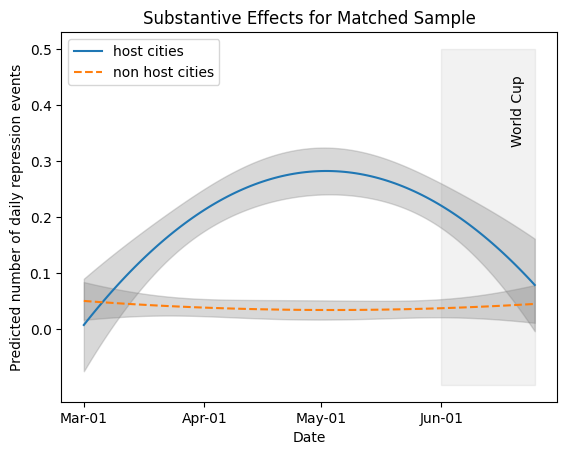

In [27]:
plt.figure()

plt.plot(host_cities_df.index, host_cities_df.pred)
plt.plot(non_host_cities_df.pred, "--")

plt.fill_between(host_cities_df.index, host_cities_df.lower_limit, host_cities_df.upper_limit,
                 alpha=.3, color='grey')
plt.fill_between(non_host_cities_df.index, non_host_cities_df.lower_limit, 
                 non_host_cities_df.upper_limit, alpha=.3, color='grey')

plt.fill_between(date_range.values, -0.1, 0.5, alpha=.1, color="grey")
plt.text(datetime.datetime(1978, 6, 19), 0.33, "World Cup", rotation= 90)

plt.legend(["host cities", "non host cities"], loc="upper left")

plt.yticks(np.arange(0, 0.6, 0.1))
plt.title("Substantive Effects for Matched Sample")
plt.ylabel("Predicted number of daily repression events")
plt.xlabel("Date")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

We note that while the vague shape of the graph is correct, the original figure featured a bell-shaped curve for host cities. Ours is much smoother. This could be because of the difference in models or because of any own logical error in replicating the model. 

Our graph *does* however support the paper's conclusion. An issue with the Q2 and Q3 hypotheses is that host and non-host cities have a noticable difference in population, as obviously large, major cities are much more likely to have a stadium capable of hosting the WC's matches. In other words, repression in host cities may be noticably larger in host cities because more people existed *to* be repressed.

The graph and the results of our models above confirm that these hypotheses stand regardless of the population difference between host and non-host cities, as the samples we selected are in the same population range. 

We can therefore conclude that the paper's findings were ultimately not influenced by any control variables such as literacy, support for the junta, or past repression (Q2), nor by the military's presence in the regions (2), nor by the size of the larger cities (Q5), nor by reporting bias (Q4). The findings are supported both by predictions made by an OLS model, as well as the actual data (Q3).